In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/ML_and_NN_course/Neural Style Transfer

/content/drive/My Drive/Colab Notebooks/ML_and_NN_course/Neural Style Transfer


In [4]:
import os
import sys
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from nst_utils import *
import numpy as np
import tensorflow as tf

%matplotlib inline

In [24]:
!gdown https://drive.google.com/uc?id=1MMl9ohG8IJxEA_6rs07KbqPzO4Efi9Kd

Downloading...
From: https://drive.google.com/uc?id=1MMl9ohG8IJxEA_6rs07KbqPzO4Efi9Kd
To: /content/drive/My Drive/Colab Notebooks/ML_and_NN_course/Neural Style Transfer/imagenet-vgg-verydeep-19.mat
535MB [00:09, 55.7MB/s]


In [5]:
model = load_vgg_model("imagenet-vgg-verydeep-19.mat")
print(model)


{'input': <tf.Variable 'Variable:0' shape=(1, 300, 400, 3) dtype=float32_ref>, 'conv1_1': <tf.Tensor 'Relu:0' shape=(1, 300, 400, 64) dtype=float32>, 'conv1_2': <tf.Tensor 'Relu_1:0' shape=(1, 300, 400, 64) dtype=float32>, 'avgpool1': <tf.Tensor 'AvgPool:0' shape=(1, 150, 200, 64) dtype=float32>, 'conv2_1': <tf.Tensor 'Relu_2:0' shape=(1, 150, 200, 128) dtype=float32>, 'conv2_2': <tf.Tensor 'Relu_3:0' shape=(1, 150, 200, 128) dtype=float32>, 'avgpool2': <tf.Tensor 'AvgPool_1:0' shape=(1, 75, 100, 128) dtype=float32>, 'conv3_1': <tf.Tensor 'Relu_4:0' shape=(1, 75, 100, 256) dtype=float32>, 'conv3_2': <tf.Tensor 'Relu_5:0' shape=(1, 75, 100, 256) dtype=float32>, 'conv3_3': <tf.Tensor 'Relu_6:0' shape=(1, 75, 100, 256) dtype=float32>, 'conv3_4': <tf.Tensor 'Relu_7:0' shape=(1, 75, 100, 256) dtype=float32>, 'avgpool3': <tf.Tensor 'AvgPool_2:0' shape=(1, 38, 50, 256) dtype=float32>, 'conv4_1': <tf.Tensor 'Relu_8:0' shape=(1, 38, 50, 512) dtype=float32>, 'conv4_2': <tf.Tensor 'Relu_9:0' sha

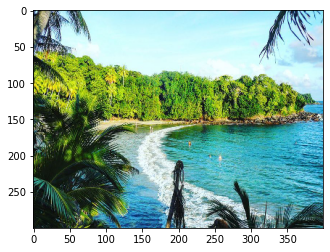

In [27]:
import imageio
content_image = imageio.imread("Images/content4.png")
imshow(content_image)

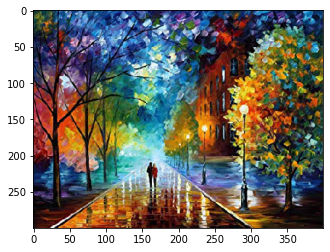

In [7]:
style_image = imageio.imread("Images/style5.png")
imshow(style_image)

In [8]:
def compute_style_cost(model, STYLE_LAYERS):
   
    J_style = 0

    for layer_name, coeff in STYLE_LAYERS:

        
        out = model[layer_name]
        a_S = sess.run(out)

        a_G = out
        
        J_style_layer = compute_layer_style_cost(a_S, a_G)

        J_style += coeff * J_style_layer

    return J_style

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


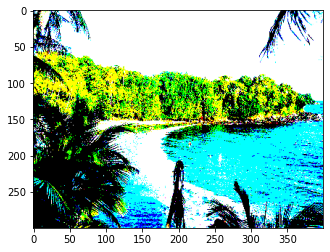

In [9]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

content_image = imageio.imread("Images/content4.png")
content_image = reshape_and_normalize_image(content_image)

style_image = imageio.imread("Images/style5.png")
style_image = reshape_and_normalize_image(style_image)

generated_image = generate_noise_image(content_image)
imshow(generated_image[0])

generated_image = generate_noise_image(content_image)
imshow(generated_image[0])

In [16]:
model = load_vgg_model("imagenet-vgg-verydeep-19.mat")


In [17]:


sess.run(model['input'].assign(content_image))

out = model['conv4_2']
a_C = sess.run(out)
a_G = out

J_content = compute_content_cost(a_C, a_G)



In [21]:


STYLE_LAYERS = [
    ('conv1_1', 0.2),
    ('conv2_1', 0.2),
    ('conv3_1', 0.2),
    ('conv4_1', 0.2),
    ('conv5_1', 0.2)]
sess.run(model['input'].assign(style_image))
J_style = compute_style_cost(model, STYLE_LAYERS)

In [22]:
J = total_cost(J_content, J_style, alpha = 10, beta = 40)

In [23]:
optimizer = tf.train.AdamOptimizer(2.0)

train_step = optimizer.minimize(J)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
def model_nn(sess, input_image, num_iterations = 200,op='output/6/'):
    
   
    sess.run(tf.global_variables_initializer())
   
    sess.run(model['input'].assign(input_image))
   
    
    for i in range(num_iterations):
        sess.run(train_step)
        generated_image = sess.run(model['input'])
        
        if i%20 == 0:
            Jt, Jc, Js = sess.run([J, J_content, J_style])
            print("Iteration " + str(i) + " :")
            print("total cost = " + str(Jt))
            print("content cost = " + str(Jc))
            print("style cost = " + str(Js))
                        
            save_image(op + str(i) + ".png", generated_image)
    
    save_image(op+'generated_image.jpg', generated_image)
    
    return generated_image

In [25]:
model_nn(sess, generated_image,op='output/')

Iteration 0 :
total cost = 20236575000.0
content cost = 12525.123
style cost = 505911230.0
Iteration 20 :
total cost = 2963124000.0
content cost = 22744.377
style cost = 74072420.0
Iteration 40 :
total cost = 988593500.0
content cost = 24945.104
style cost = 24708600.0
Iteration 60 :
total cost = 512881760.0
content cost = 26377.936
style cost = 12815450.0
Iteration 80 :
total cost = 324597540.0
content cost = 27357.459
style cost = 8108099.5
Iteration 100 :
total cost = 231021340.0
content cost = 28048.26
style cost = 5768521.5
Iteration 120 :
total cost = 178104560.0
content cost = 28544.258
style cost = 4445478.0
Iteration 140 :
total cost = 144944130.0
content cost = 28970.287
style cost = 3616360.8
Iteration 160 :
total cost = 122480380.0
content cost = 29343.48
style cost = 3054673.8
Iteration 180 :
total cost = 106319510.0
content cost = 29658.434
style cost = 2650573.2


array([[[[ -40.33375  ,    7.7741275,  149.14084  ],
         [ -69.41053  ,  -38.044117 ,   78.28088  ],
         [ -87.8839   , -142.78857  ,   81.96698  ],
         ...,
         [  43.615265 ,   72.03293  ,  159.964    ],
         [  55.798965 ,  119.53565  ,  207.46008  ],
         [  55.720135 ,   61.952038 ,   91.83761  ]],

        [[ -70.88176  ,  -29.289911 ,   97.79667  ],
         [ -61.545692 ,  -26.05198  ,   88.54302  ],
         [ -91.18122  , -158.93526  ,   50.91651  ],
         ...,
         [  45.727947 ,   76.028305 ,  142.52594  ],
         [  57.7978   ,  119.97774  ,  146.30855  ],
         [  57.929817 ,  138.62247  ,  165.2802   ]],

        [[ -62.073257 ,    7.421606 ,   84.012184 ],
         [ -25.060677 ,   32.572556 ,  114.12949  ],
         [-108.27184  , -179.0689   ,   22.70689  ],
         ...,
         [  15.100768 ,   29.254038 ,  135.98703  ],
         [  41.236397 ,  110.81919  ,  121.71635  ],
         [  69.101776 ,  129.16794  ,  168.63437  ]],

In [26]:
img_path="Images/content3.jpg"
name="content.png"

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(300, 400))      #To resize the content and style images for the required size
x = tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
img.save('Images/'+name)

(300, 400, 3)
